In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/1_Papers/3_Attack_generation')
from utils.utils import setup_logging, get_config_from_yaml, process_config, print_config
from trainer.trainer import PatchTrainer
import torch
import pickle

# Train

In [2]:
model_names = ['pidnet_l','pidnet_m','pidnet_s','icnet','bisenet_v1','bisenet_v2','segformer']
#model_names = ['icnet','bisenet_v1','bisenet_v2','segformer']
#model_names = ['segformer']
for model in model_names:
  ## getting the config file
  config = get_config_from_yaml('/content/drive/MyDrive/Colab Notebooks/1_Papers/3_Attack_generation/configs/config.yaml',model = model)
  #print_config(config)

  ## processing config to initialize directories for logs etc
  main_logger = process_config(config)

  ## training
  train_obj = PatchTrainer(config,main_logger)
  save = train_obj.train()
  pickle.dump( save, open(config.experiment.log_patch_address+config.model.name+".p", "wb" ) )

Streaming output truncated to the last 5000 lines.
Epochs: 13/30 || Samples: 1392/2975 || Lr: 0.005000 || Loss: nan || mIoU: 0.1645 || Cost Time: 19:27:09 || Estimated Time: 23:52:42
Epochs: 13/30 || Samples: 1393/2975 || Lr: 0.005000 || Loss: 0.0736 || mIoU: 0.1645 || Cost Time: 19:27:11 || Estimated Time: 23:52:40
Epochs: 13/30 || Samples: 1394/2975 || Lr: 0.005000 || Loss: 0.0042 || mIoU: 0.1645 || Cost Time: 19:27:13 || Estimated Time: 23:52:38
Epochs: 13/30 || Samples: 1395/2975 || Lr: 0.005000 || Loss: 0.0612 || mIoU: 0.1645 || Cost Time: 19:27:14 || Estimated Time: 23:52:36
Epochs: 13/30 || Samples: 1396/2975 || Lr: 0.005000 || Loss: 0.0215 || mIoU: 0.1645 || Cost Time: 19:27:16 || Estimated Time: 23:52:35
Epochs: 13/30 || Samples: 1397/2975 || Lr: 0.005000 || Loss: 0.0538 || mIoU: 0.1645 || Cost Time: 19:27:18 || Estimated Time: 23:52:33
Epochs: 13/30 || Samples: 1398/2975 || Lr: 0.005000 || Loss: 0.0054 || mIoU: 0.1645 || Cost Time: 19:27:20 || Estimated Time: 23:52:31
Epochs:

KeyboardInterrupt: 

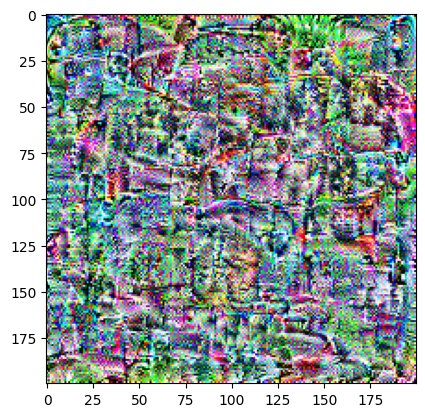

In [6]:
import matplotlib.pyplot as plt
a = train_obj.patch
plt.imshow(a.detach().cpu().permute(1,2,0))
plt.show()

In [7]:
import pickle
pickle.dump( a, open( "/content/drive/MyDrive/Colab Notebooks/1_Papers/3_Attack_generation/Experiments/segformer.p", "wb" ) )

In [ ]:
a = torch.tensor([1,2,3,4])

import pickle
pickle.dump( a, open( "/content/drive/MyDrive/Colab Notebooks/1_Papers/3_Attack_generation/Experiments/1_AblationStudy/save.p", "wb" ) )

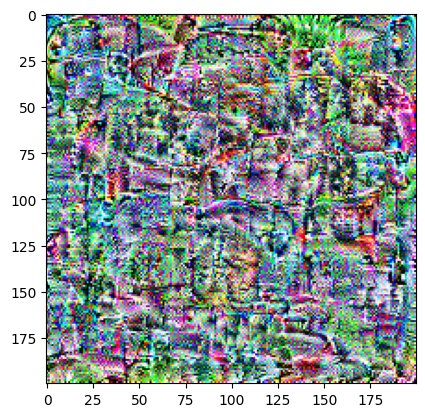

In [9]:
b = pickle.load(open( "/content/drive/MyDrive/Colab Notebooks/1_Papers/3_Attack_generation/Experiments/segformer.p", "rb" ))
plt.imshow(b.detach().cpu().permute(1,2,0))
plt.show()

In [ ]:

aa = pickle.load(open( "/content/drive/MyDrive/Colab Notebooks/1_Papers/3_Attack_generation/Experiments/pidnet_l.p", "rb" ))
aa[0].device

device(type='cuda', index=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.1682334..2.0].


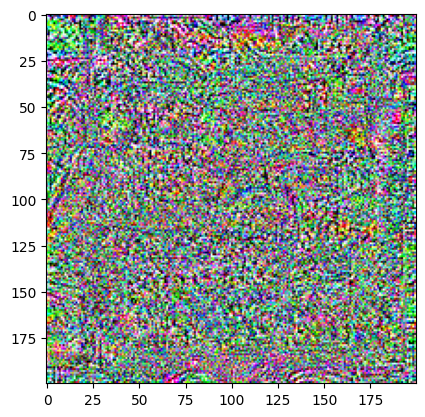

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(aa[0].cpu().permute(1,2,0))
plt.show()

In [ ]:
# prompt: get device of a

import pickle

a = pickle.load(open( "/content/drive/MyDrive/Colab Notebooks/1_Papers/3_Attack_generation/Experiments/pidnet_l.p", "rb" ))

# Assuming 'a' is a list or other iterable containing objects with a 'device' attribute.
# Adjust the following loop based on the actual structure of your data.

for item in a:
  try:
    print(item.device)
  except AttributeError:
    print(f"Object does not have a 'device' attribute: {item}")


cuda:0
Object does not have a 'device' attribute: [[0.3386513  0.17220375 0.93622386 0.7776826  0.8395879  0.7042088
  0.7558877  0.8386709  0.935553   0.84721905 0.9139582  0.8824559
  0.77683187 0.95356977 0.91135114 0.9351516  0.954405   0.7943377
  0.81861883]]


In [ ]:
a[0]

device(type='cuda', index=0)